In [ ]:
# ─────────────────────────────────────────────────────────────
# 🔐 Environment Setup
# ─────────────────────────────────────────────────────────────
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

# ─────────────────────────────────────────────────────────────
# 🧠 State Definition
# ─────────────────────────────────────────────────────────────
from typing import TypedDict

class BlogState(TypedDict):
    topic: str
    title: str
    content: str

# ─────────────────────────────────────────────────────────────
# 🤖 LLM Setup
# ─────────────────────────────────────────────────────────────
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

# ─────────────────────────────────────────────────────────────
# 🧩 Node Definitions
# ─────────────────────────────────────────────────────────────
from langchain.schema import SystemMessage
from langchain.schema import HumanMessage

def title_creator(state: BlogState) -> BlogState:
    response = llm.invoke([
        SystemMessage(content="You are a blog post title generator."),
        HumanMessage(content=f"Generate a catchy title for the following blog post content:\n{state['topic']}")
    ])
    state['title'] = response.content
    return state

def content_creator(state: BlogState) -> BlogState:
    response = llm.invoke([
        SystemMessage(content="You are a blog post content generator."),
        HumanMessage(content=f"Generate a detailed blog post on the following topic with the title '{state['title']}':\n{state['topic']}")
    ])
    state['content'] = response.content
    return state

def display_node(state: BlogState) -> str:
    return f"Title: {state['title']}\n\n{state['content']}"

# ─────────────────────────────────────────────────────────────
# 🔗 Graph Construction
# ─────────────────────────────────────────────────────────────
from langgraph.graph import StateGraph
from langgraph.graph import START
from langgraph.graph import END

builder = StateGraph(BlogState)

builder.add_node("title_creator", title_creator)
builder.add_node("content_creator", content_creator)
builder.add_node("display_node", display_node)

builder.add_edge(START, "title_creator")
builder.add_edge("title_creator", "content_creator")
builder.add_edge("content_creator", "display_node")
builder.add_edge("display_node", END)

blogCreatorGraph = builder.compile()

# ─────────────────────────────────────────────────────────────
# 📊 Graph Visualization
# ─────────────────────────────────────────────────────────────
from IPython.display import Image
from IPython.display import display

display(Image(blogCreatorGraph.get_graph().draw_mermaid_png()))

# ─────────────────────────────────────────────────────────────
# 🚀 Execution
# ─────────────────────────────────────────────────────────────
result = blogCreatorGraph.invoke({"topic": "The Future of AI in Everyday Life"})
print(result)


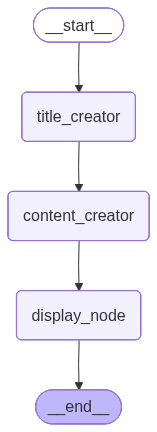


📝 Title: "Unleashing the Power: Iron Man Wields Mjolnir After Snapping the Infinity Stones"

Title: "Unleashing the Power: Iron Man Wields Mjolnir After Snapping the Infinity Stones"

Introduction:
In the vast and intricate Marvel Cinematic Universe, we have witnessed some truly awe-inspiring moments that have left fans in utter disbelief and excitement. One such moment that has captured the imagination of fans worldwide is the possibility of Iron Man wielding Mjolnir after snapping the Infinity Stones. Imagine the sheer power and potential that could be unleashed if Tony Stark, the genius billionaire playboy philanthropist, were to harness the power of Thor's enchanted hammer. Let's delve into this intriguing scenario and explore the implications of such a monumental event.

The Setup:
In the epic battle against Thanos in "Avengers: Endgame," we saw the Avengers facing insurmountable odds as they fought to undo the Mad Titan's devastating snap. As the battle raged on, Thor, Captain A

In [ ]:
# llm setup
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

# build graph
from typing import TypedDict
class BlogState(TypedDict):
    topic: str
    title: str
    content: str

# creating nodes
from langchain.schema import SystemMessage,HumanMessage

def title_creator(state: BlogState) -> BlogState:
    response = llm.invoke([
        SystemMessage(content="You are a blog post title generator."),
        HumanMessage(content=f"Generate a catchy title for the following blog post content:\n{state['topic']}")
    ])
    state['title'] = response.content
    return state

def content_creator(state: BlogState) -> BlogState:
    response = llm.invoke([
        SystemMessage(content="You are a blog post content generator."),
        HumanMessage(content=f"Generate a detailed blog post on the following topic with the title '{state['title']}':\n{state['topic']}")
    ])
    state['content'] = response.content
    return state

def display_node(state: BlogState) -> BlogState:
    # Optionally print or log here
    print(f"\n📝 Title: {state['title']}\n\n{state['content']}\n")
    return state  # Return full state, not just a string

# build graph

from langgraph.graph import StateGraph, START, END

builder = StateGraph(BlogState)

builder.add_node("title_creator", title_creator)
builder.add_node("content_creator", content_creator)
builder.add_node("display_node", display_node)

builder.add_edge(START, "title_creator")
builder.add_edge("title_creator", "content_creator")
builder.add_edge("content_creator", "display_node") 
builder.add_edge("display_node", END)

blogCreatorGraph = builder.compile()

# visualize graph
#from IPython.display import Image, display
#display(Image(blogCreatorGraph.get_graph().draw_mermaid_png()))

result = blogCreatorGraph.invoke({"topic": "what if mjolnir comes to ironman after snapping infinity stones"})

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 502.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`


📝 Title: "Unleashing the Power: Iron Man Wields Mjolnir After Snapping the Infinity Stones"

Title: "Unleashing the Power: Iron Man Wields Mjolnir After Snapping the Infinity Stones"

Introduction:
In the vast and intricate Marvel Cinematic Universe, we have witnessed some truly awe-inspiring moments that have left fans in utter disbelief and excitement. One such moment that has captured the imagination of fans worldwide is the possibility of Iron Man wielding Mjolnir after snapping the Infinity Stones. Imagine the sheer power and impact this moment would have on the MCU and the fate of the universe. Let's delve into this intriguing scenario and explore the potential consequences of such a monumental event.

The Setup:
The stage is set during the epic battle against Thanos in "Avengers: Endgame." As the Mad Titan unleashes his fury upon Earth, the Avengers assemble for one final stand to prevent him from eradicating half of all life in the universe. Iron Man, played by the incomparabl

NameError: name 'state' is not defined